<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb" target="_blank"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Vinca Rosmorduc (CLS), Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?labpath=Case_studies%2FMaritime_safety%2FExtreme_waves%2FSWH_storms_2023.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/Maritime_safety/Extreme_waves/SWH_storms_2023.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download data from the EUMETSAT Data Store
- **<a href="https://data.marine.copernicus.eu/register" target="_blank">A Copernicus Marine Service (CMEMS) account</a>** to download data from the CMEMS Data Store
    
There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using Sentinel-3 SRAL and Sentinel-6 data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-SRAL" target="_blank">Learn SRAL (EUMETSAT Gitlab)</a>**

</div>
<hr>

# Exploring extreme waves during a major North Atlantic winter storms in November, 2023

### <a id='dataused'>Data used

| Dataset | EUMETSAT Data Store<br>collection ID | EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description | Copernicus Marine<br>Data Store product ID | Copernicus Marine<br>product description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| Sentinel-3 SRAL level-2 | EO:EUM:DAT:0415 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:SENTINEL-3:SR_2_WAT___NTC" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-3:SR_2_WAT___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASR_2_WAT___" target="_blank">Description</a>| - | - |
| Global Ocean Waves Analysis and Forecast | - | - | EO:MO:DAT:GLOBAL_ANALYSISFORECAST_WAV_001_027 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AGLOBAL_ANALYSISFORECAST_WAV_001_027" target="_blank">Description</a> | GLOBAL_ANALYSISFORECAST_WAV_001_027 | <a href="https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_WAV_001_027/description" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* how to download level-2 altimetry data from the EUMETSAT Data Store using the **eumetsat data access (eumdac)** client
* how to download level-4 wave data from the Copernicus Marine Service using the **Copernicus Marine API** client
* how significant wave height is derived from altimetry waveforms
* how to plot significant wave height in context of storms using both level-2 and level-4 data

### Outline

Understanding the occurence of extreme waves is essential for promoting marine safety, informing maritime operations, determining the positioning of coastal defenses and marine spatial planning. Extreme waves can arise due to a number of drivers, including tsunamis and superpostion of smaller wave signals (Rogue Waves[[1]](#ref1)), but are most commonly associated with wind-wave interactions during major storms[[2]](#ref2). Space-based altimeters measure surface topography of the ocean, recording its height on various scales, and are able to detect these waves. In this case study we will use altimetry to investigate the occurrence of extreme waves around three storms in the northwest Atlantic.

In October and November 2023, three major storms impacted Western Europe, bringing gale-force winds and heavy rains. Storms Céline, Ciaran and Domingos ([Figure 1](#figure1)) caused loss of life, extensive damage, and massive disruption to services, utilities and travel across the region. Italy, France, the Netherlands, Belgium, Germany, Spain and the UK were all extensively affected. The coastal regions were subject to widespread flooding and extreme waves.

<figure><center>
  <video controls src="./North_Atlantic_Storms.mp4" width='75%'></video>
  <figcaption width='75%'><a id='figure1'></a>Figure 1: Storms Céline, Ciaran and Domingos crossing the north west Atlantic in October/November, 2023, as shown in this Metosat Second Generation (MSG) Airmass RGB animation, extracted from <a href="https://view.eumetsat.int/productviewer?v=74797" target="_blank">EUMETView</a> (Credit: <a href="https://www.eumetsat.int/" target="_blank">EUMETSAT</a>)</figcaption>
</center></figure>

Sea state and wave height can be categorised using the Douglas Sea Scale ([Figure 2](#figure2)). Extreme waves are associated with very high (degree 8; 9-14 m) and phenomenal (degree 9; >14 m) seas. Altimeters emit radar pulses and receive the incoming signal, reflected from the ocean surface as waveforms. From these we can retrieve three key pieces of information; the sea surface height, the wind speed and the significant wave height. We are interested in the <a href="https://en.wikipedia.org/wiki/Significant_wave_height" target="_blank">significant wave height</a> (SWH), which is defined as the mean height of the top third of the sampled waves. By comparing our measured SWH with the Douglas Sea Scale thresholds, we can isolate occurrences of extreme waves generated by our storms of interest.

<figure><center>
<img src='https://www.researchgate.net/publication/355226332/figure/tbl1/AS:1079286052192269@1634333255790/Sea-States-Codes-based-on-Douglas-Sea-Scale.png' align='centre' width='50%'/>
  <figcaption><a id='figure2'>Figure 2: Categorisation of sea-state using the <a href="https://www.researchgate.net/publication/355226332/figure/tbl1/AS:1079286052192269@1634333255790/Sea-States-Codes-based-on-Douglas-Sea-Scale.png" target="_blank">Douglas Sea Scale</a> (Credit: <a href=https://www.researchgate.net/publication/355226332_Sea_Wave_Energy_A_Review_of_the_Current_Technologies_and_Perspectives" target="_blank">Curto et al., (2021)<a>, CC-BY-4.0)</figcaption>
</center></figure>

A single altimeter measures SWH in a narrow track directly beneath the satellite. This "level-2" data is distributed by EUMETSAT for both <a href="https://user.eumetsat.int/data/satellites/sentinel-3/altimetry-service/resources">Sentinel-3 SRAL</a> (Synthetic Aperture Radar Altimeter) and <a href="https://user.eumetsat.int/data/satellites/sentinel-6/altimetry-service/resources" target="_blank">Sentinel-6</a> - the two altimetry missions under the Copernicus Programme. We can aggregate many of these tracks, from many altimeters, into a single gridded file (level-3) and, with further processing, generate a fully gap-filled product (level-4), such as those distributed by the <a href="https://marine.copernicus.eu/" target="_blank">Copernicus Marine Service (CMEMS)</a>. In this Jupyter Notebook, we will look at both level-2 and level-4 products to gain an understanding of how altimeters work and how they are able to monitor the ocean the evolution of extreme waves around storms.

#### References:

1. <a id='ref1'></a> <a href="https://www.nature.com/articles/s41598-021-89359-1" target="_blank">Häfner, D., Gemmrich, J., & Jochum, M. (2021). Real-world rogue wave probabilities. Scientific reports, 11(1), 10084.<a>
2. <a id='ref2'></a> <a href="https://www.sciencedirect.com/science/article/abs/pii/B978012396483000011X" target="_blank">Hansom, J. D., Switzer, A. D., & Pile, J. (2015). Extreme waves: Causes, characteristics, and impact on coastal environments and society. In Coastal and marine hazards, risks, and disasters (pp. 307-334). Elsevier.<a>
3. <a id='ref3'></a> <a href="https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2023JC019722" target="_blank">Bromirski, P. D. (2023). Climate‐Induced Decadal Ocean Wave Height Variability From Microseisms: 1931–2021. Journal of Geophysical Research: Oceans, 128(8), e2023JC019722.</a>

<div class="alert alert-info" role="alert">

## <a id='TOCTOP'></a>Contents

</div>

 1. [Step 1: Setting up our analysis](#section1)
 1. [Step 2: Downloading level-2 altimetry products from the EUMETSAT Data Store](#section2)
 1. [Step 3: Plot altimetry derived significant wave height and winds](#section3)
 1. [Step 4: Looking at level-2 waveforms](#section4)
 1. [Step 5: Downloading level-4 significant wave height reanalysis from the Copernicus Marine Service](#section5)
 1. [Step 6: Exploring level-4 significant wave height products](#section6)
 1. [Step 7: Conclusions](#section7)

<hr>

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting up our analysis
[Back to top](#TOCTOP)

</div>

In this section we will set up all the parameters we need to run our notebook.

We will begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../README.md" target="_blank">README</a>**.

If you are running on WEkEO, you should ensure that you have selected the "**miniwekeolab**" environment/ipkernel using the menu option on the top right of the panel. 

In [1]:
import cartopy                         # a library that supports mapping and projection
import cartopy.crs as ccrs             # a library that supports mapping and projection
import copernicusmarine                # a library to help us access CMEMS data
import datetime                        # a library that allows us to work with dates and times
import eumdac                          # a tool that helps us download via the eumetsat/data-store
import getpass                         # a library to help us enter passwords
import glob                            # a library that helps us search for files
import matplotlib                      # a library the provides plotting capability
import matplotlib.pyplot as plt        # a library the provides plotting capability
from pathlib import Path               # a library that helps construct system path objects
import numpy as np                     # a library that lets us work with arrays; we import this with a new name "np"
import os                              # a library that allows us access to basic operating system commands
import shutil                          # a library that allows us access to basic operating system commands like copy
import warnings                        # a library that supports managing warning messages
import xarray as xr                    # a library that helps us work efficiently with multi-dimensional arrays
from xcube.webapi.viewer import Viewer # a library that provides the Xcube viewer
import zipfile                         # a library that support zipping/unzipping files

# turn off warnings and set fontsize
warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 24})

# set Xcube server if running on WEkEO
if "WEKEO_DATABROKER_URL" in os.environ:
    os.environ["XCUBE_JUPYTER_LAB_URL"] = f"https://jupyterhub.prod.wekeo2.eu/user/{os.environ['JUPYTERHUB_USER']}/"

We now have access to all the libraries that we need to run our analysis. Nothing else will be imported during this notebook.

We are going to study an area west of France and south west Ireland, over a time period that matches our storms. We will define our area using a simple square box (`ROI`), which we will then convert into a WKT (<a href="https://libgeos.org/specifications/wkt/#:~:text=%E2%80%9CWell%2Dknown%20text%E2%80%9D%20is,into%20a%20standard%20text%20string." target="_blank">Well Known Text</a>) polygon, that will help with our searches. Our time period of interest is set by defining our `start` and `end` dates.

In [2]:
# defining our bounding box (W, E, S, N)
ROI = [-30.0, 0.0, 40.0, 55.0]

# make a WKT polygon string for this box
roi = [[ROI[0], ROI[2]], [ROI[1], ROI[2]], [ROI[1], ROI[3]], [ROI[0], ROI[3]], [ROI[0], ROI[2]]]
polygon = 'POLYGON(({}))'.format(','.join(["{} {}".format(*coord) for coord in roi]))

# defining out search times
start = datetime.datetime(2023, 11, 2, 0, 0)
end = datetime.datetime(2023, 11, 4, 23, 59)

Now let us set the target data set for our level-2 data. We will begin by adding a switch (`download_l2_data`) that specifies if we should download new data, or work with data that is downloaded already. If you are running this notebook for the first time, this should be set to true, but you can set it to false if you are looking to adapt the analysis later on.

Our level-2 Data is stored in the EUMETSAT Data Store. Every type of data, known as a collection, has a specific ID (`collectionID`), which we will set here. For Sentinel-3 altimetry products, the collections contain tracks from both Sentinel-3A and Sentinel-3B, but we will choose to refine our search by `satellite` to narrow down the analysis.

Lastly, rather than download the entire products, we will choose to download just two `components`. The "reduced_measurements" give us the low-frequency (1Hz) data that we need to plot our SWH. The "enhanced_measurements" contain the waveforms we will use to learn about how SWH is derived. For more information on the EUMETSAT products, please see the links in the [Data Used](#dataused) section.

*Note: Although we are working with Sentinel-3B data, we could also choose to work with Sentinel-3A, Sentinel-6 or Jason-3. We would have to make some small adaptations to accommodate slightly different products and variables for SWH and waveforms in the case of the latter two. You can change to Sentinel-3A with no further changes required.*

In [3]:
# Download new L2 data or not?
download_l2_data = True

# our EUMETSAT Data Store collection
collectionID = 'EO:EUM:DAT:0415'

# our satellite of interest
satellite = "Sentinel-3B"

# the components we should download
components = ["reduced_measurement.nc", "enhanced_measurement.nc"]

For our level-4 Copernicus Marine Service products, we need only set two parameters; the `CMEMS_productID`, a unique ID that points to our data set of interest and the `CMEMS_variables` which determine the variables we want to retrieve. For more information on the CMEMS products, please see the links in the [Data Used](#dataused) section.

In [4]:
CMEMS_productID = "cmems_mod_glo_wav_anfc_0.083deg_PT3H-i"
CMEMS_variables = ['VHM0']

Finally, we will define directory to download our Sentinel-3 SRAL products into. By default we will set this to a directory called "products" that is in the same folder as this notebook.

In [5]:
# Create a download directory for our products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Downloading level-2 altimetry products from the EUMETSAT Data Store
[Back to top](#TOCTOP)

</div>

In this section we will connect to the EUMETSAT Data Store and download all of the products we need.

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [6]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token 'cc52cc6d-5488-3c7e-9f86-578c171b4be8' expires 2025-06-11 15:18:47.068490


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [7]:
datastore = eumdac.DataStore(token)

Data in the Data Store are stored as collections, each with its own ID. If we don't know our collection ID *a priori*, we can find this information via the **<a href="https://data.eumetsat.int/">Data Store GUI</a>** or by asking `eumdac` to tell us about all available SRAL as follows:

In [8]:
# list all SRAL collection IDs - if we don't know a priori which collection we are interested in (this can take a minute or so to run the first time). 
print(f"Collections found: {len(datastore.collections)}")

for collection_id in datastore.collections:
    if ("SRAL" in collection_id.title):
        if "non-public" in collection_id.abstract: continue
        print(f"Collection ID({collection_id}): {collection_id.title}")

Collections found: 156
Collection ID(EO:EUM:DAT:0406): SRAL Level 1B - Sentinel-3
Collection ID(EO:EUM:DAT:0413): SRAL Level 1A Unpacked L0 Complex echos - Sentinel-3
Collection ID(EO:EUM:DAT:0414): SRAL Level 1B stack echoes - Sentinel-3
Collection ID(EO:EUM:DAT:0415): SRAL Level 2 Altimetry Global - Sentinel-3
Collection ID(EO:EUM:DAT:0834): SRAL Level 2 Altimetry Global (version BC005) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0583): SRAL Level 1A Unpacked L0 Complex Echoes (version BC004) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0584): SRAL Level 1B (version BC004) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0586): SRAL Level 2 Altimetry Global (version BC004) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0585): SRAL Level 1B Stack Echoes (version BC004) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0835): SRAL Level 1B Stack Echoes (version BC005) - Sentinel-3 - Reprocessed
Collection ID(EO:EUM:DAT:0836): SRAL Level 1A Unpacked L0 Complex E

In [Section 1](#section1) of this notebook, we set our collectionID as `EO:EUM:DAT:0415`. We can see from the list above, that this corresponds to the "SRAL Level 2 Altimetry Global - Sentinel-3" collection.

We should note that this collection includes both Sentinel-3A & Sentinel-3B, and that this data is available with three "timeliness" delays; NRT, STC and NTC.

* near real time (NRT) products (\_NR\_) are available for very recent times (>3 hours) at lower quality (`timeliness="NR"`)
* short time critical (STC) products (\_ST\_) are available in some cases if we have chosen a fairly recent time (>48 hours) (`timeliness="ST"`)
* non time-critical (NTC) products (\_NT\_) are the highest quality, but are available with a delay (> 1 month) (`timeliness="NT"`)

NRT and STC products are replaced by NTC products as they become available. We could choose to narrow our search *timeliness*, but as we are looking at older events, only NTC are available anyway. It is also worth noting that, periodically, EUMETSAT reprocess entire campaigns and the highest quality data for a given period is then available in the analogous reprocessing collection (in this case `EO:EUM:DAT:0834`)

Lets now connect to our collection using the `get_collection` method...

In [9]:
selected_collection = datastore.get_collection(collectionID)

Now we have our collection of interest, lets see what options we have for searching our collection...

In [10]:
selected_collection.search_options

{'bbox': {'title': 'Inventory which has a spatial extent overlapping this bounding box',
  'options': []},
 'geo': {'title': 'Inventory which has a spatial extent overlapping this Well Known Text geometry',
  'options': []},
 'title': {'title': 'Can be used to define a wildcard search on the product title (product identifier), use set notation as OR and space as AND operator between multiple search terms',
  'options': [None]},
 'sat': {'title': 'Mission / Satellite',
  'options': ['Sentinel-3A', 'Sentinel-3B']},
 'type': {'title': 'Product Type', 'options': ['SR_2_WAT___']},
 'dtstart': {'title': 'Temporal Start', 'options': []},
 'dtend': {'title': 'Temporal End', 'options': []},
 'publication': {'title': 'publication date', 'options': []},
 'zone': {'title': 'Equi7grid main continental zone',
  'options': ['AN', 'NA', 'AS', 'OC', 'EU', 'SA', 'AF']},
 't6': {'title': 'Equi7grid 600km tile', 'options': []},
 'timeliness': {'title': 'Timeliness', 'options': ['NT', 'NR', 'ST']},
 'orbit

Applying our chosen options, we can refine our search to obtain **only** the products that match our criteria. Lets apply our search and list our results.

In [11]:
products = selected_collection.search(geo=polygon, sat=satellite, dtstart=start, dtend=end)

for product in products:
    print(product)

S3B_SR_2_WAT____20231104T222825_20231104T231345_20231130T140830_2720_086_029______MAR_O_NT_005.SEN3
S3B_SR_2_WAT____20231104T204746_20231104T213236_20231130T122311_2689_086_028______MAR_O_NT_005.SEN3
S3B_SR_2_WAT____20231104T112652_20231104T121252_20231130T031212_2760_086_023______MAR_O_NT_005.SEN3
S3B_SR_2_WAT____20231103T225430_20231103T233956_20231129T143804_2726_086_015______MAR_O_NT_005.SEN3
S3B_SR_2_WAT____20231103T211344_20231103T215857_20231129T125644_2713_086_014______MAR_O_NT_005.SEN3
S3B_SR_2_WAT____20231103T115303_20231103T123741_20231129T033902_2678_086_009______MAR_O_NT_005.SEN3
S3B_SR_2_WAT____20231102T213948_20231102T222508_20231128T133554_2720_085_385______MAR_O_NT_005.SEN3
S3B_SR_2_WAT____20231102T121913_20231102T130533_20231128T040650_2780_085_380______MAR_O_NT_005.SEN3
S3B_SR_2_WAT____20231102T103814_20231102T112534_20231128T024141_2840_085_379______MAR_O_NT_005.SEN3


We can see from our list that we only have non-time critical (\_NT\_) products, but remember that, for more recent events, we may see near real-time and short-time critical products. We can always add a "timeliness" argument to refine the search as required.

Let's now loop through our products and download the specified components (if `download_l2_data=True`, above), or gather them from our download directory (if `download_l2_data=False`, above). If you are downloading for the first time, you should find that, after running this cell your download directory has all of the listed products within it.

In [12]:
if download_l2_data:
    downloaded_components = []
    
    for product, count in zip(products, range(len(products))):
    
        product_download_directory = os.path.join(download_dir, str(product))
        os.makedirs(product_download_directory, exist_ok=True)
    
        # download the required product components
        for entry in product.entries:
            res = [ele for ele in components if(ele == os.path.basename(entry))]
            if res:
                with product.open(entry=entry) as fsrc, open(os.path.join(product_download_directory, fsrc.name),
                                                            mode='wb') as fdst:
                    downloaded_components.append(os.path.join(product_download_directory, fsrc.name))
                    print(f'Downloading ({count+1}/{len(products)}) {product}: {fsrc.name}.')
                    shutil.copyfileobj(fsrc, fdst)
else:
    downloaded_components = sorted(glob.glob(os.path.join(download_dir, "*", components[0])))

If you look in these products you will notice that they containe three different files plus a manifest XML file. We can be more specific in our downloading using a number of different options, which we can show below. We now have all the SRAL data we need to proceed...

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Plot altimetry derived significant wave height from level-2 data
[Back to top](#TOCTOP)

</div>

Now we have our products, we can start to work with them. Lets start by opening our "reduced measurement" files. We will do this using the **xarray** package. By using the `open_mfdataset` method, we can open them all at the same time and combined them into one **DataSet**.

In [13]:
# select input file
s3_files = glob.glob(os.path.join(download_dir, 'S*', components[0]))

# We sort the files by "alphabetical" order (default), but pass numbers are also correctly ordered, which is our goal
# this sorting will provide with a well-orderer dataset/nc file (see next cell). 
s3_files.sort()

ds_s3 = xr.open_mfdataset(s3_files, combine='by_coords')

Let's look at the contents of our DataSet. If you click on the small grey arrow under variables, you should be able to find some that begin with *swh_*.

In [14]:
ds_s3

<xarray.Dataset> Size: 9MB
Dimensions:                               (time_01: 19858)
Coordinates:
  * time_01                               (time_01) datetime64[ns] 159kB 2023...
    lat_01                                (time_01) float64 159kB dask.array<chunksize=(2303,), meta=np.ndarray>
    lon_01                                (time_01) float64 159kB dask.array<chunksize=(2303,), meta=np.ndarray>
Data variables: (12/62)
    UTC_day_01                            (time_01) datetime64[ns] 159kB dask.array<chunksize=(2303,), meta=np.ndarray>
    UTC_sec_01                            (time_01) float64 159kB dask.array<chunksize=(2303,), meta=np.ndarray>
    surf_type_01                          (time_01) float32 79kB dask.array<chunksize=(2303,), meta=np.ndarray>
    surf_class_01                         (time_01) float32 79kB dask.array<chunksize=(2303,), meta=np.ndarray>
    rad_surf_type_01                      (time_01) float32 79kB dask.array<chunksize=(2303,), meta=np.ndarray>
    dist_coast_01                         (time_01) float64 159kB dask.array<chunksize=(2303,), meta=np.ndarray>
    ...                                    ...
    rain_flag_01_plrm_ku                  (time_01) float32 79kB dask.array<chunksize=(2303,), meta=np.ndarray>
    open_sea_ice_flag_01_ku               (time_01) float32 79kB dask.array<chunksize=(2303,), meta=np.ndarray>
    open_sea_ice_flag_01_plrm_ku          (time_01) float32 79kB dask.array<chunksize=(2303,), meta=np.ndarray>
    orbit_type_01                         (time_01) float32 79kB dask.array<chunksize=(2303,), meta=np.ndarray>
    iono_cor_alt_filtered_01_ku           (time_01) float64 159kB dask.array<chunksize=(2303,), meta=np.ndarray>
    iono_cor_alt_filtered_01_plrm_ku      (time_01) float64 159kB dask.array<chunksize=(2303,), meta=np.ndarray>
Attributes: (12/64)
    Conventions:                                 CF-1.6
    title:                                       IPF SRAL/MWR Level 2 Measure...
    mission_name:                                Sentinel 3B
    altimeter_sensor_name:                       SRAL
    radiometer_sensor_name:                      MWR
    gnss_sensor_name:                            GNSS
    ...                                          ...
    algo_bias_wind_speed_sig0_sar_ku_added:      -0.0008
    algo_bias_wind_speed_2p_sig0_sar_ku_added:   2.7735
    algo_bias_wind_speed_2p_swh_sar_ku_added:    0.0
    algo_bias_wind_speed_sig0_plrm_ku_added:     0.02795
    algo_bias_wind_speed_2p_sig0_plrm_ku_added:  2.8071
    algo_bias_wind_speed_2p_swh_plrm_ku_added:   0.0

Now lets read in the variables we want; our spatial coordinates (lat_01/lon_01), and our significant wave height (swh_ocean_01_ku). The "01" refers to the fact that we are reading in the 1 Hz data.

In [15]:
# load coordinates
lon_s3 = ds_s3['lon_01']
lat_s3 = ds_s3['lat_01']

# load the data ; we take the Significant Wave Height field at 1 Hz in Ku band, SAR-mode (plrm would do, too), over ocean surfaces.
swh_s3 = ds_s3['swh_ocean_01_ku']

Let's now close our DataSet.

In [16]:
ds_s3.close()

Now we can isolate the indices where the SWH is above the thresholds defined by our Douglas Sea Scale degree 8 (high seas) and 9 (phenomenal seas).

In [17]:
douglas_8 = np.where(swh_s3 > 9.0)
douglas_9 = np.where(swh_s3 > 14.0)

We now have all the information we need to plot our data, so lets see what they show. We willplot all of our tracks on a map, showing the SWH everywhere and then denote the locations that correspond to our thresholds.

The cell below may seem complex, but there is no analysis here, just management of how the plot looks.

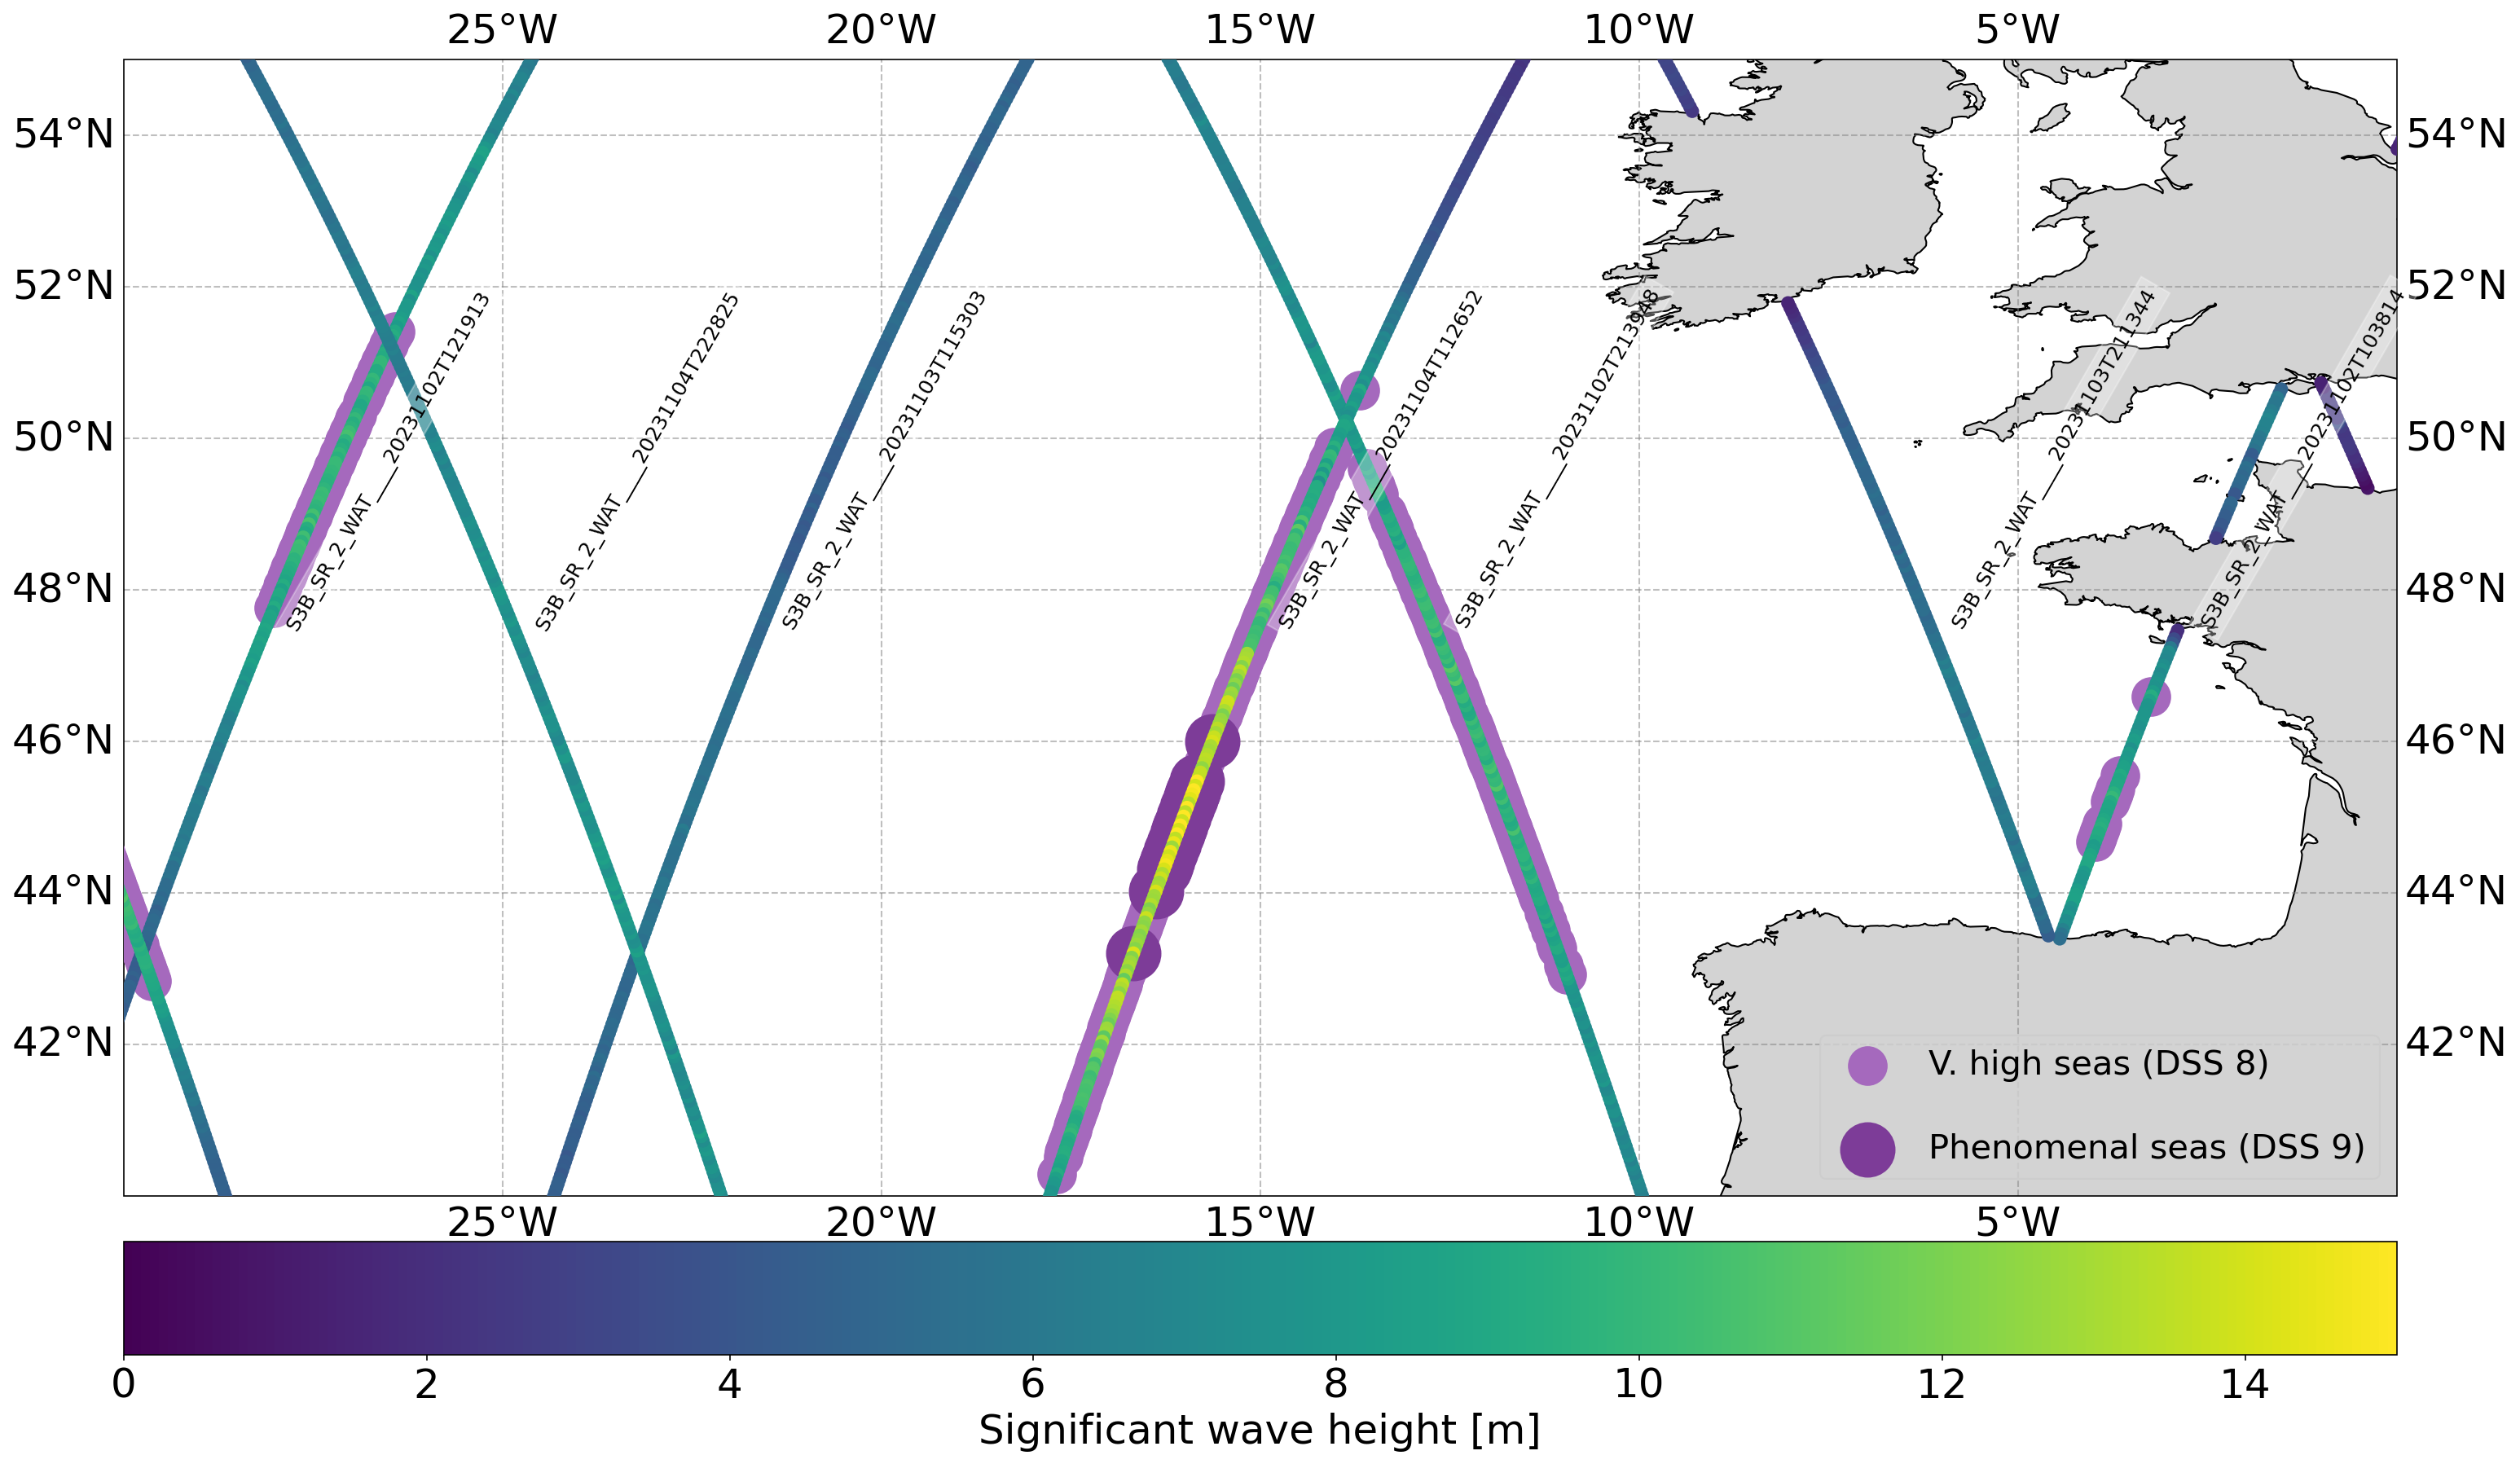

In [18]:
# make a figure
fig = plt.figure(figsize=(24,16), dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())

# decorate the figure
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--', zorder=100)
ax.set_extent(ROI, crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=1)

# plot and show the data
tracks_s3 = ax.scatter(lon_s3, lat_s3, c=swh_s3, s=50, vmin=0, vmax=15, marker='o', edgecolors=None, cmap="viridis", zorder=10)
p1 = ax.scatter(lon_s3[douglas_9], lat_s3[douglas_9], c="#7D3C98", s=1000, vmin=0, vmax=15, marker='o', edgecolors=None, zorder=9)
p2 = ax.scatter(lon_s3[douglas_8], lat_s3[douglas_8], c="#A569BD", s=500, vmin=0, vmax=15, marker='o', edgecolors=None, zorder=8)

# add a legend
plt.legend([p2, p1], ["V. high seas (DSS 8)", "Phenomenal seas (DSS 9)"], loc=4, labelspacing=1.5, facecolor='lightgrey', fontsize=20)

# add a colorbar 
cbar = plt.colorbar(tracks_s3, orientation="horizontal", pad=0.03)
cbar.set_label('Significant wave height [m]')

# annotate the tracks with their names
lat_avg = (ROI[2] + ROI[3])/2
for s3_file in s3_files:
    ds_s3 = xr.open_dataset(s3_file)
    ii = np.where(np.abs(ds_s3.lat_01 - lat_avg) == np.nanmin(np.abs(ds_s3.lat_01 - lat_avg)))
    LON = ds_s3.lon_01[ii]
    LON[LON>180] = LON[LON>180]-360
    if ROI[1] - 1 > LON > ROI[0] + 1:
        plt.annotate('_'.join(os.path.basename(os.path.dirname(s3_file)).split('_')[0:8]), (ds_s3.lon_01[ii] + 0.25, ds_s3.lat_01[ii]),
                     fontsize=12, rotation=60, color='k', zorder=10000, backgroundcolor=(1.0, 1.0, 1.0, 0.3))
    ds_s3.close()

plt.show()

We can see from our plot that all 9 of our tracks are present, with each described by a single ascending or descending pass. Some of the tracks show instances of very high seas (light purple), but one in particular (S3B_SR_2_WAT____20231104T112652_) shows extremely high waves, up to and including 14 m! This track corresponds to the passing of Storm Domingos. Lets take a closer look at this track in the next section....

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Looking at level-2 waveforms
[Back to top](#TOCTOP)

</div>

We've looked at the SWH, but lets now take a closer look at the level-2 data to see how we derive these values. Sea surface height, wind speed and significant wave height are all derived from different aspects of the waveform that the altimeter measures. The waveform is constructed from the radar pulse that the satellite itself emits, reflected back from the surface of the ocean (Figure 3)  
<figure><center>
<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies/-/raw/main/img/Waveforms.png' width='50%'/>
  <figcaption>Figure 3: SAR and LRM waveform schematic.</figcaption>
</center></figure>

In both low-resolution mode (LRM, also known as "classical") and SAR mode, as used by Sentinel-3 SRAL, Changes in SWH alter the gradient of the leading slope of the waveform. Let's open the track from [Section 3](#section3) that features our extreme waves and compare waveforms from sections with high-waves and those from a more quiescent ocean.

In the cell below, we will open a single "enhanced_measurement" file and subset it by the latitude limits of our map.

In [19]:
# select input file
input_file = os.path.join(download_dir, 'S3B_SR_2_WAT____20231104T112652_20231104T121252_20231130T031212_2760_086_023______MAR_O_NT_005.SEN3', 'enhanced_measurement.nc')

# open input file, select only the part we were looking at above, using this time the "20Hz" data since waveforms are only provided with this resolution
ds = xr.open_dataset(input_file)
ds_subset = ds.sel(time_20_ku=( (ds.lat_20_ku > ROI[2] ) & (ds.lat_20_ku < ROI[3])))
ds.close()

Lets look at what we have in our DataSet. You will see that we have many more variables than in the reduced measurement file, including the waveforms and the 20 Hz high resolution data.

In [20]:
ds_subset

<xarray.Dataset> Size: 165MB
Dimensions:                                        (time_01: 2760,
                                                    time_20_ku: 5244,
                                                    time_20_c: 54169,
                                                    echo_sample_ind: 128)
Coordinates:
  * time_01                                        (time_01) datetime64[ns] 22kB ...
  * time_20_ku                                     (time_20_ku) datetime64[ns] 42kB ...
  * time_20_c                                      (time_20_c) datetime64[ns] 433kB ...
  * echo_sample_ind                                (echo_sample_ind) int8 128B ...
    lat_01                                         (time_01) float64 22kB ...
    lon_01                                         (time_01) float64 22kB ...
    lat_20_ku                                      (time_20_ku) float64 42kB ...
    lon_20_ku                                      (time_20_ku) float64 42kB ...
    lat_20_c                                       (time_20_c) float64 433kB ...
    lon_20_c                                       (time_20_c) float64 433kB ...
Data variables: (12/392)
    UTC_day_01                                     (time_01) datetime64[ns] 22kB ...
    UTC_sec_01                                     (time_01) float64 22kB ...
    UTC_day_20_ku                                  (time_20_ku) datetime64[ns] 42kB ...
    UTC_sec_20_ku                                  (time_20_ku) float64 42kB ...
    UTC_day_20_c                                   (time_20_c) datetime64[ns] 433kB ...
    UTC_sec_20_c                                   (time_20_c) float64 433kB ...
    ...                                             ...
    num_20hz_meas_01_ku                            (time_01) float32 11kB ...
    num_20hz_meas_01_c                             (time_01) float32 11kB ...
    orbit_type_01                                  (time_01) float32 11kB ...
    waveform_qual_ice_20_ku                        (time_20_ku) float32 21kB ...
    iono_cor_alt_filtered_01_ku                    (time_01) float64 22kB ...
    iono_cor_alt_filtered_01_plrm_ku               (time_01) float64 22kB ...
Attributes: (12/64)
    Conventions:                                 CF-1.6
    title:                                       IPF SRAL/MWR Level 2 Measure...
    mission_name:                                Sentinel 3B
    altimeter_sensor_name:                       SRAL
    radiometer_sensor_name:                      MWR
    gnss_sensor_name:                            GNSS
    ...                                          ...
    algo_bias_wind_speed_sig0_sar_ku_added:      -0.0008
    algo_bias_wind_speed_2p_sig0_sar_ku_added:   2.7735
    algo_bias_wind_speed_2p_swh_sar_ku_added:    0.0
    algo_bias_wind_speed_sig0_plrm_ku_added:     0.02795
    algo_bias_wind_speed_2p_sig0_plrm_ku_added:  2.8071
    algo_bias_wind_speed_2p_swh_plrm_ku_added:   0.0

Lets read in some variables and find the highest SWH values in our track file at both 1 Hz and 20 Hz.

In [21]:
# read the variables
echo_sample_ind = ds_subset['echo_sample_ind']
waveform_20_ku = ds_subset['waveform_20_ku']
swh_ocean_20_ku = ds_subset['swh_ocean_20_ku']
swh_ocean_01_ku = ds_subset['swh_ocean_01_ku']
lat20 = ds_subset['lat_20_ku']
lat1 = ds_subset['lat_01']

# plot SWH at 20 Hz - note that those data are much noisier than 1 Hz ones (NB. 1Hz data have not been extracted over only part of the track)
print('max swh 20 Hz ku', np.max(swh_ocean_20_ku).values)
print('max swh 1 Hz ku', np.max(swh_ocean_01_ku).values)

max swh 20 Hz ku 19.799
max swh 1 Hz ku 15.537


We can see that, due to its high-frequency and increased resolution, the 20 Hz data captures a higher SWH than the 1 Hz data. Lets plot the traces and compare them.

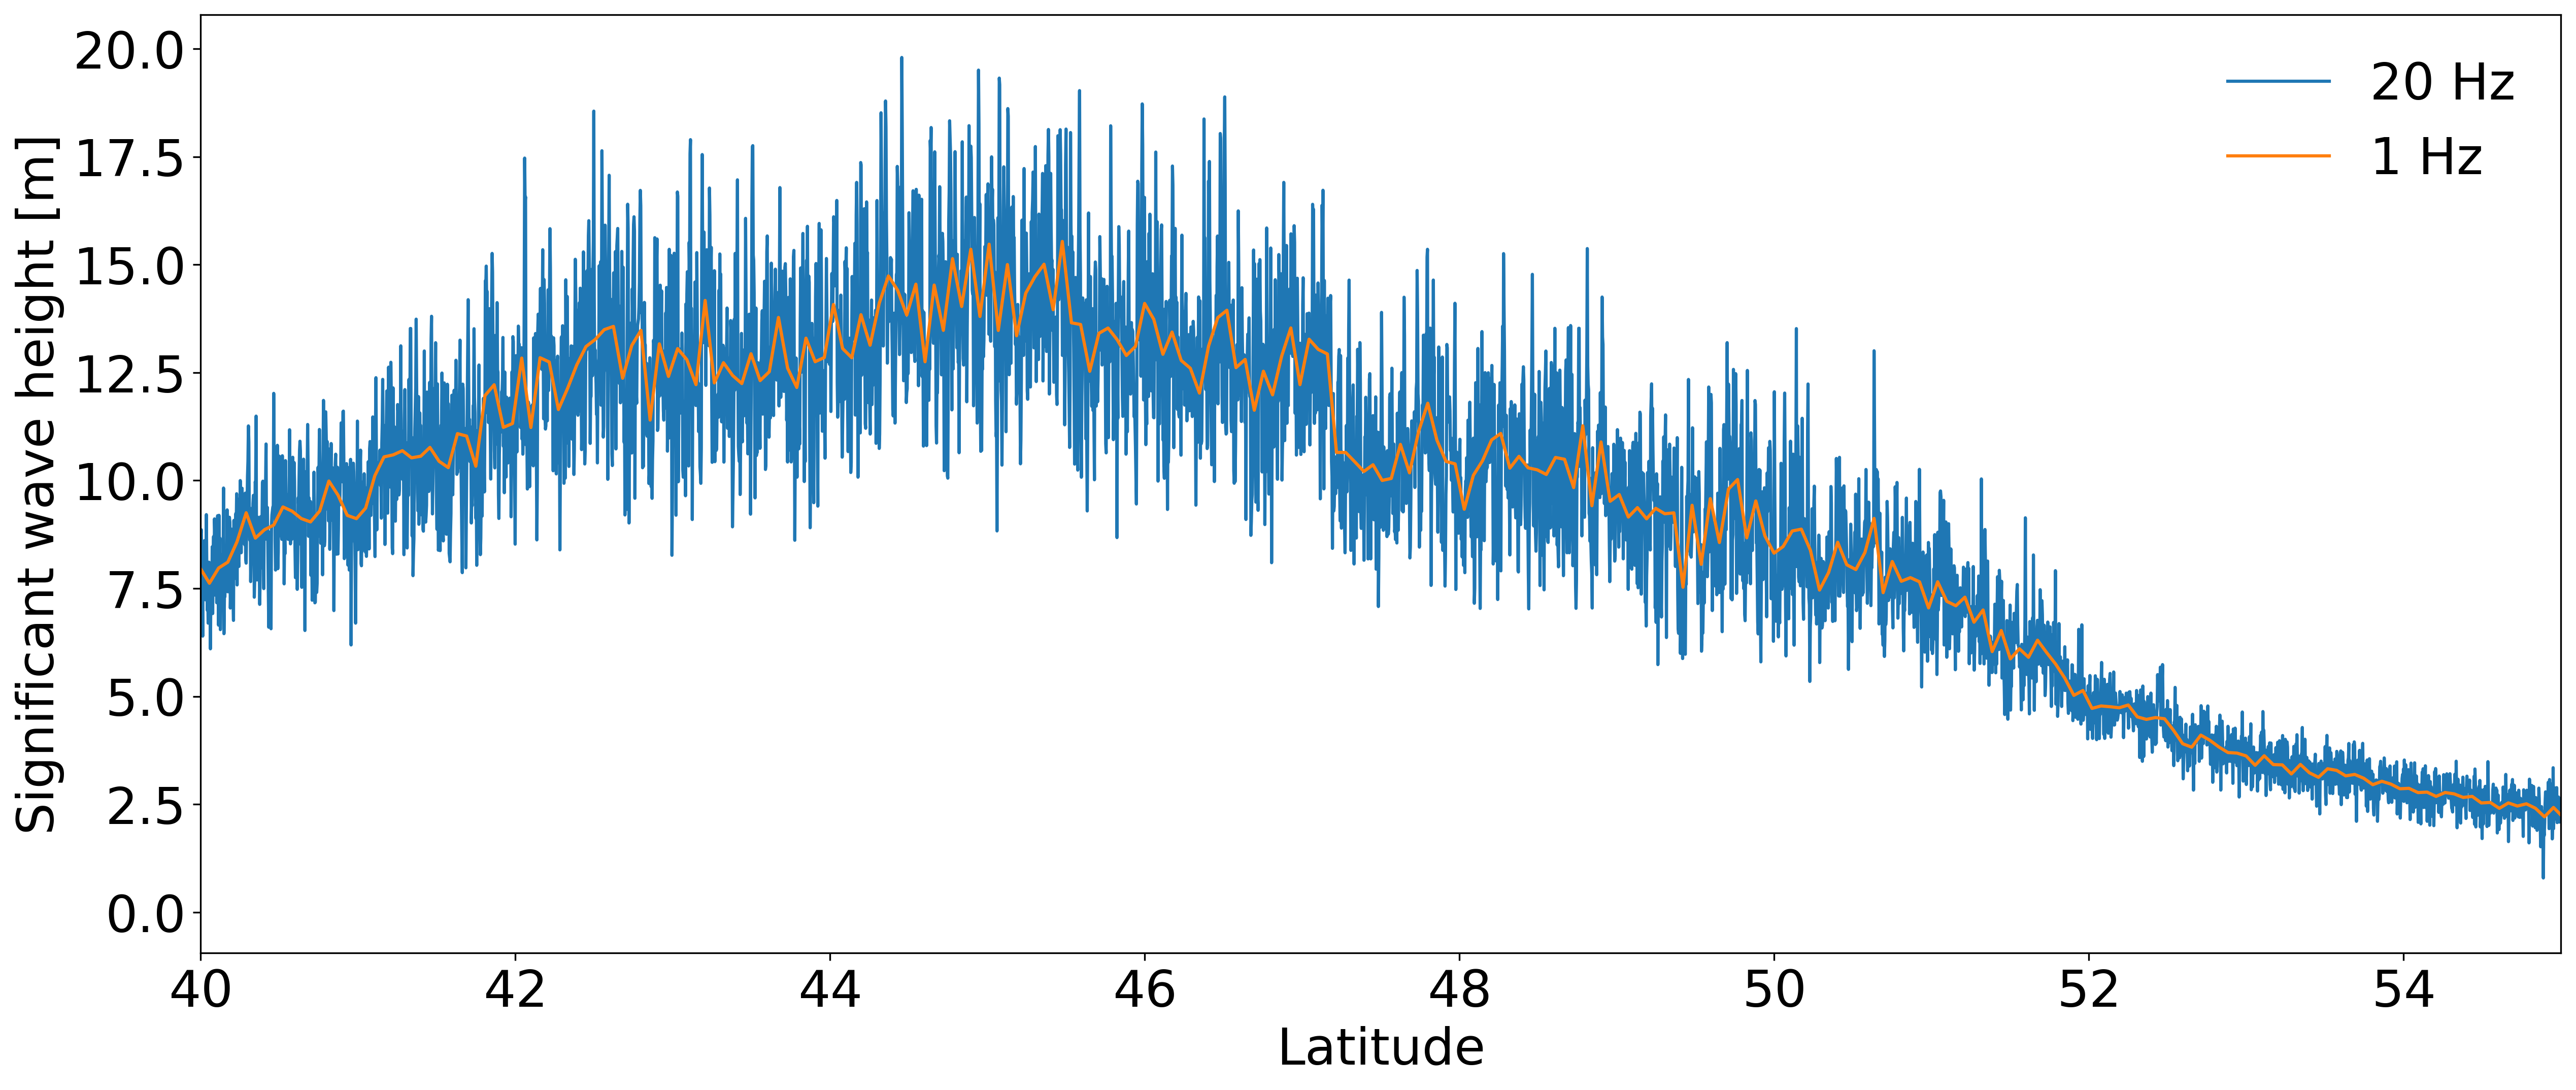

In [22]:
fig = plt.figure(figsize=(20, 8), dpi=300)
plt.xlim(ROI[2], ROI[3])
p1, = plt.plot(lat20, swh_ocean_20_ku)
p2, = plt.plot(lat1, swh_ocean_01_ku)
plt.xlabel("Latitude")
plt.ylabel("Significant wave height [m]")
plt.legend([p1, p2],["20 Hz", "1 Hz"], frameon=False);

We can see that the 20 Hz data is considerably more "spikey", capturing more of the variability in the ocean surface. Lets now plot the waveform at the maximum and minimum SWH at 20 Hz, to see what they look like and how they compare.

In [23]:
waveform_20_ku_max = waveform_20_ku.sel(time_20_ku=(swh_ocean_20_ku == np.max(swh_ocean_20_ku)))
waveform_20_ku_min = waveform_20_ku.sel(time_20_ku=(swh_ocean_20_ku == np.min(swh_ocean_20_ku)))
wvf_min = waveform_20_ku_min[0,:]
wvf_max = waveform_20_ku_max[0,:]

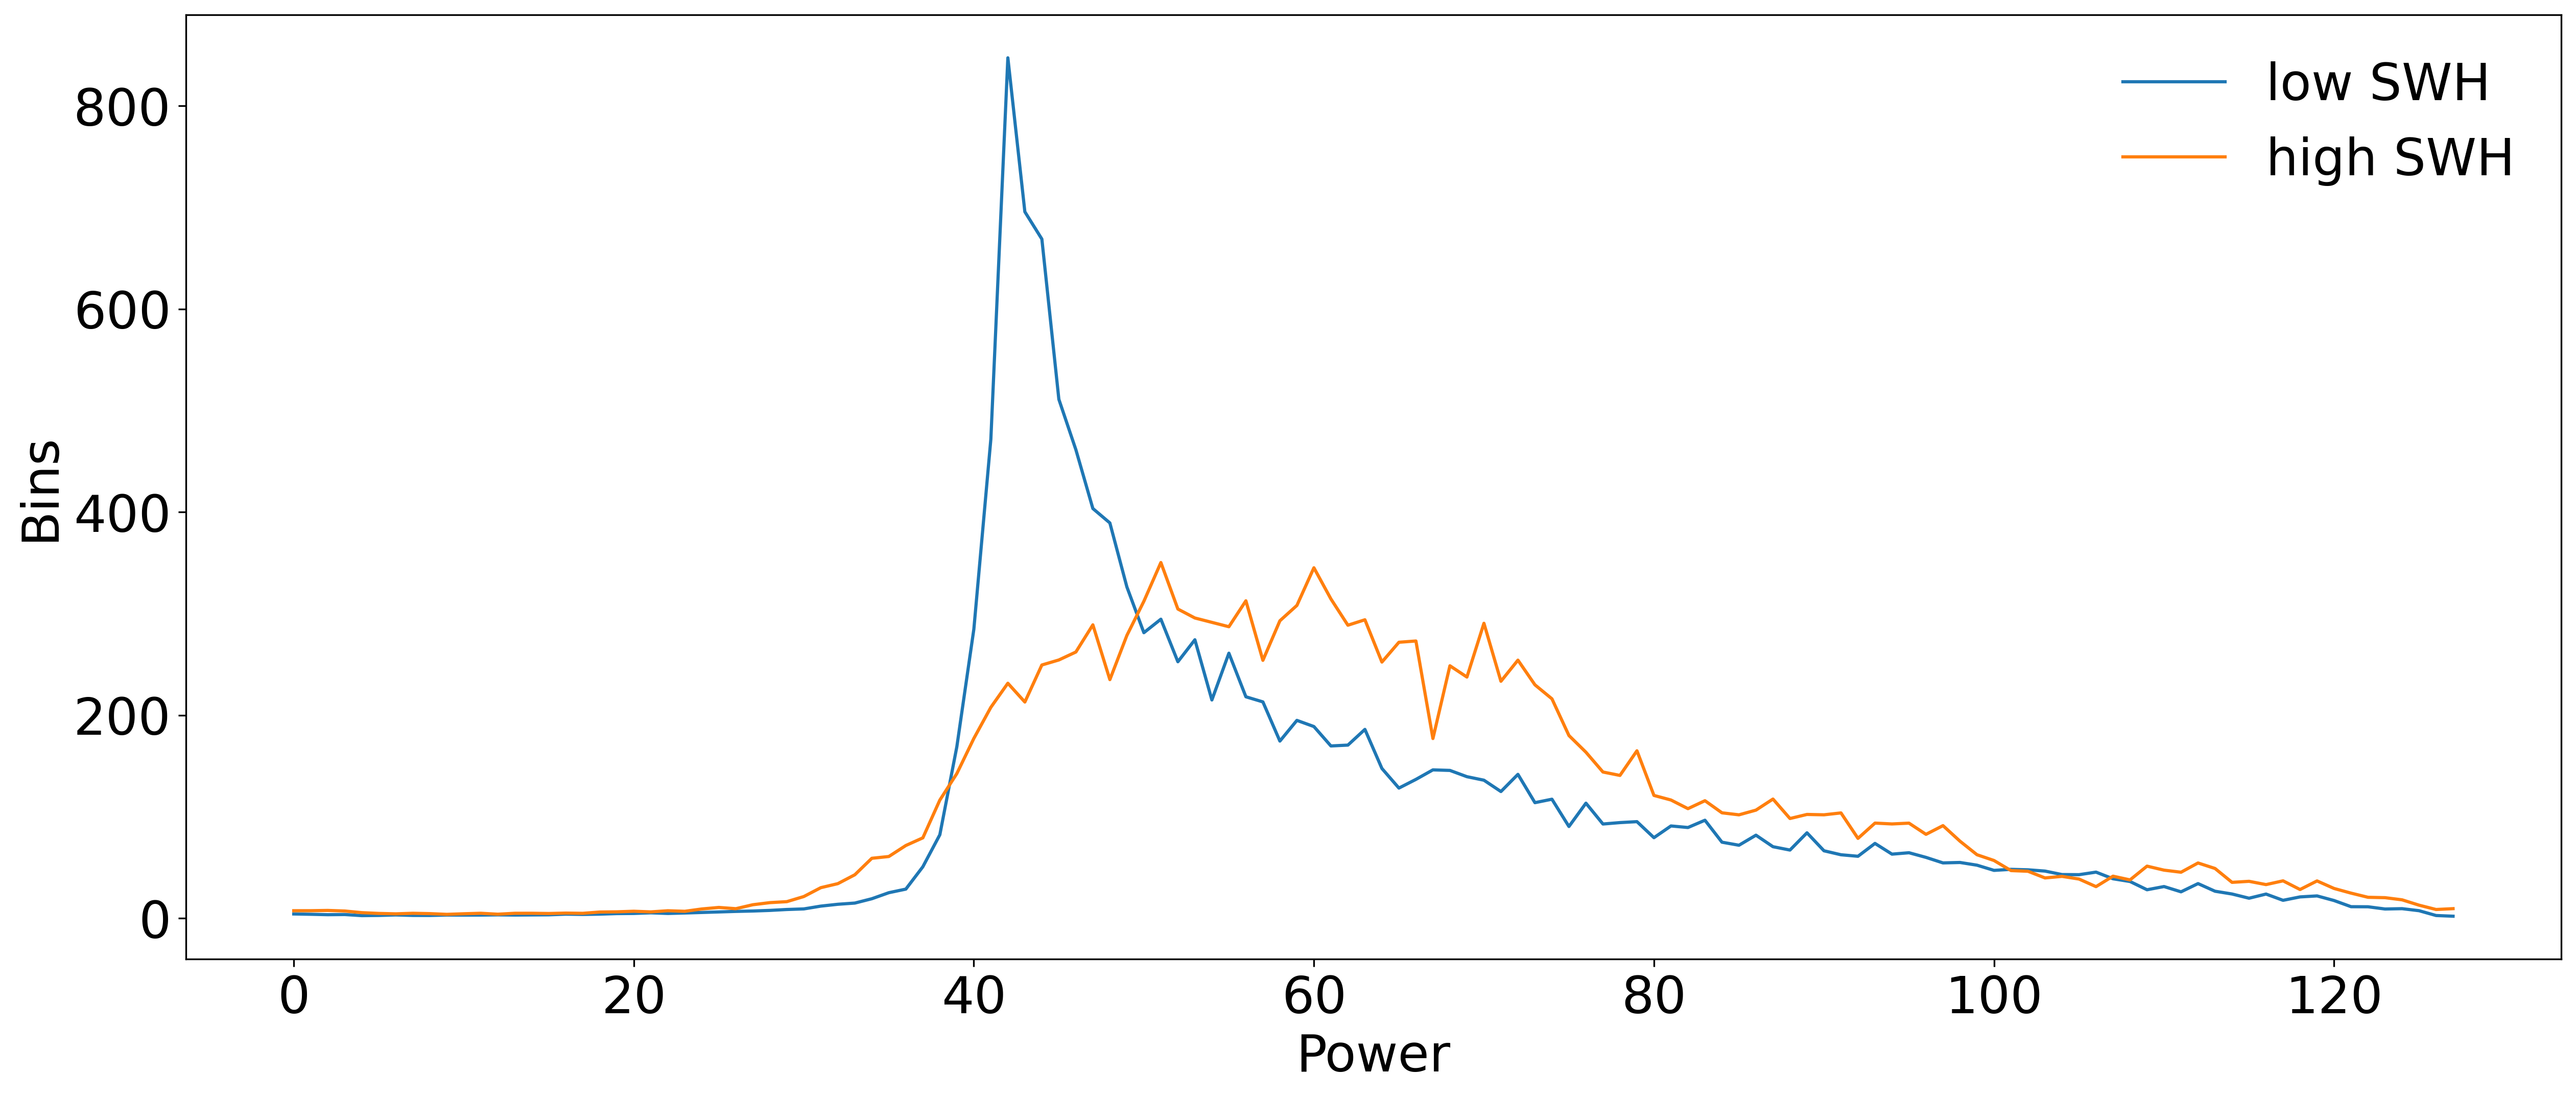

In [24]:
fig = plt.figure(figsize=(20, 8), dpi=300)
p1, = plt.plot(echo_sample_ind, wvf_min)
p2, = plt.plot(echo_sample_ind, wvf_max)
plt.xlabel("Power")
plt.ylabel("Bins")
plt.legend([p1, p2],["low SWH", "high SWH"], frameon=False);

Note the difference between the two! The "low-SWH" waveform is close to theoretical shape from Figure 3, (note that we are looking at data in SAR-mode, not LRM). The leading edge slope in the high SWH case is much shallower. However, it is important to ask the question; where exactly is the slope in the high SWH case?

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Acquiring level-4 gridded products from the Copernicus Marine Service
[Back to top](#TOCTOP)

</div>

We've looked quite in depth at the more fundamental end of the data spectrum, the individual waveform. Now lets look at the other end of the spectrum, the aggregated, level-4 gap-filled data sets made available through the Copernicus Marine Service. We have specified all of our user parameters in [Section 1](#section1), but we need to connect to the Copernicus Marine Service using the Copernicus Marine API to retrieve the data. We will use the API to load the data directly into memory, without the need to download anything.

<div class="alert alert-block alert-success">

### Accessing Copernicus Marine Service products

To retrieve the data, we need will use the <a href="https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introduction" target="_blank">Copernicus Marine API</a>. This allows us to remotely subset the data and read it directly into memory, for immediate use. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install the toolkit using;

`conda install -c conda-forge copernicusmarine`

To download data using the Copernicus Marine API, you need to provide credentials. To obtain these, you should register at the <a href="https://data.marine.copernicus.eu/register" target="_blank">Copernicus Marine Service</a> for an account and take note of you `username` and `password`. If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: For more information on authentication options please see this <a href="https://help.marine.copernicus.eu/en/articles/8185007-copernicus-marine-toolbox-credentials-configuration" target="_blank">web article</a>.*

</div>

In [25]:
# Default location expected by the copernicusmarine package
copernicus_marine_credentials_file = Path(Path.home() / '.copernicusmarine' / '.copernicusmarine-credentials')

# Create it only if it does not already exists
if not copernicus_marine_credentials_file.is_file():
    copernicusmarine.login()

Now we are authenticated, let's connect to our data set using the `open_dataset` method in the `copernicusmarine` toolkit.

In [26]:
ds_L4 = copernicusmarine.open_dataset(
               dataset_id=CMEMS_productID,
               variables=CMEMS_variables,
               minimum_longitude=ROI[0],
               maximum_longitude=ROI[1],
               minimum_latitude=ROI[2],
               maximum_latitude=ROI[3],
               start_datetime=start.strftime("%Y-%m-%dT00:00:00.000Z"),
               end_datetime=end.strftime("%Y-%m-%dT23:59:59.000Z"))

INFO - 2025-06-10T14:19:12Z - Dataset version was not specified, the latest one was selected: "202411"
INFO - 2025-06-10T14:19:12Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2025-06-10T14:19:13Z - Service was not specified, the default one was selected: "arco-geo-series"


Lets look at our DataSet...

In [27]:
ds_L4

<xarray.Dataset> Size: 13MB
Dimensions:    (time: 24, latitude: 181, longitude: 361)
Coordinates:
  * latitude   (latitude) float64 1kB 40.0 40.08 40.17 ... 54.83 54.92 55.0
  * longitude  (longitude) float64 3kB -30.0 -29.92 -29.83 ... -0.08333 0.0
  * time       (time) datetime64[ns] 192B 2023-11-02 ... 2023-11-04T21:00:00
Data variables:
    VHM0       (time, latitude, longitude) float64 13MB ...
Attributes: (12/16)
    Conventions:           CF-1.6
    area:                  GLO
    contact:               servicedesk.cmems@mercator-ocean.eu
    credit:                E.U. Copernicus Marine Service Information (CMEMS)
    geospatial_lat_max:    90.0
    geospatial_lat_min:    -80.0
    ...                    ...
    geospatial_lon_step:   0.0833282470703125
    geospatial_lon_units:  degree
    institution:           METEO-FRANCE
    producer:              CMEMS - Global Monitoring and Forecasting Centre
    product:               GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    references:            http://marine.copernicus.eu

You can see that, unlike level-2 data, level-4 data is regularly gridded and is essentially a "cube" of data. You can see this in the `VHM0` variable, which has dimensions of *time, latitude, longitude*.

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Exploring level-4 gridded products
[Back to top](#TOCTOP)

</div>

There are a variety of nice plotting tools to view gridded data, and we are going to use one called `xcube` that allows us to explore temporally and spatially. 

Below, we will set up our "viewer", configuring a *style* that will determine how we see the data in the viewer.

In [28]:
viewer = Viewer(
    server_config={
        "Styles": [
            {
                "Identifier": "SWH",
                "ColorMappings": {
                    "VHM0": {"ValueRange": [0, 12], "ColorBar": "Spectral_r"}
                },
            }        
        ]
    }
)

404 GET /viewer/config/config.json (127.0.0.1): xcube viewer has not been been configured
404 GET /viewer/config/config.json (127.0.0.1) 3.67ms


Lets now add our Dataset to the viewer, associating it with our defined *style*, and show the viewer. The viewer will open the latest "time slice" of the data set, but you can iterate it in time using the arrow buttons and click on any "populated" pixel to see a time series. You can also animate the whole time series using the "play" button.

Explore the tool to see how the gridded SWH field changes in response to the storms.

In [29]:
viewer.add_dataset(ds_L4, title="SWH operational", style="SWH");
viewer.show()

<div class="alert alert-info" role="alert">

## <a id='section7'></a>7. Conclusions
[Back to top](#TOCTOP)

</div>

Over the course of this notebook we have explored two different data sets to see how we derive significant wave height, and how we can visualise it from both single sensor/track and aggregated, gap-filled perspectives. Recent research suggests that heightened wave activity, with extreme waves events occuring more regularly [[3]](#ref3). The coastal effects of these waves is likely to be exacerbated by rising sea-levels, with consequences for coastal communities and infrastructure. As a result, our ability to monitor extreme waves, and wave fields in general, through sensors like altimeters is essential to informing our ability to forecast sea state and react more quickly.

### Suggested next steps

* We have centered this example on 3 storms in the North Atlantic in October and November 2023, but, should you wish to, you can apply the notebook equally to other storm events.
* You could also choose to investigate ways to add more contextual data to this analysis; other CMEMS products can be simply added to the the xcube viewer.
* Alternatively, if you wish to understand more about using altimetry data from either Sentinel-3 or Sentinel-6, you can explore the <a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-SRAL" target="_blank">Learn SRAL</a> and <a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-S6" target="_blank">Learn S6</a> git repositories.


<hr>
<a href="../../../Index.ipynb" target="_blank"><< Index</a>
<hr>

<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>